In [2]:
import networkx as nx
import pandas as pd
import community as community_louvain  
import igraph as ig
from cdlib import algorithms
import community.community_louvain as community_louvain
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(r"D:\22DKHA1\project\Project_1_coauthor_edges.csv")
# Chuyển Weight về int
df["Weight"] = df["Weight"].astype(str).str.extract(r"(\d+)").astype(int)
df.head()

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'graph_tool', 'leidenalg', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'leidenalg'}


,Author1,Author2,Weight
0,Joseph Sambrook,Elisabeth Fritsch,1
1,Joseph Sambrook,Tom Maniatis,1
2,Elisabeth Fritsch,Tom Maniatis,1
3,Keith E. Muller,Jacob Cohen,1
4,Jacob Cohen,Peter A. Lachenbruch,1


In [3]:
# Tạo graph từ edge list
# NetworkX Graph
G = nx.from_pandas_edgelist(df, "Author1", "Author2", edge_attr="Weight")

# iGraph Graph
ig_graph = ig.Graph.TupleList(df.itertuples(index=False),
                              directed=False, weights=True)

print("Số node:", G.number_of_nodes())
print("Số cạnh:", G.number_of_edges())


Số node: 9212
Số cạnh: 136198


In [13]:
# === Đọc dữ liệu cạnh đồng tác giả ===
edges = pd.read_csv(r"D:\22DKHA1\project\Project_1_coauthor_edges.csv")

# Tạo mạng đồng tác giả (đồ thị vô hướng, có trọng số)
G = nx.Graph()
for _, row in edges.iterrows():
    a1, a2, w = row["Author1"], row["Author2"], row["Weight"]
    G.add_edge(a1, a2, weight=w)

# === Thống kê các chỉ số cơ bản của mạng ===
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
avg_clustering = nx.average_clustering(G)

# === In ra bảng thống kê ===
print("=== THỐNG KÊ MẠNG ĐỒNG TÁC GIẢ ===")
print(f"Số lượng nút (Nodes): {num_nodes}")
print(f"Số lượng cạnh (Edges): {num_edges}")
print(f"Mật độ mạng (Density): {density:.4f}")
print(f"Bậc trung bình (Average Degree): {avg_degree:.2f}")
print(f"Hệ số phân cụm trung bình (Clustering Coefficient): {avg_clustering:.4f}")

=== THỐNG KÊ MẠNG ĐỒNG TÁC GIẢ ===
Số lượng nút (Nodes): 9212
Số lượng cạnh (Edges): 136198
Mật độ mạng (Density): 0.0032
Bậc trung bình (Average Degree): 29.57
Hệ số phân cụm trung bình (Clustering Coefficient): 0.8608


1. Số lượng nút (Nodes): 9212

Đây là số lượng tác giả duy nhất xuất hiện trong toàn bộ dữ liệu bạn thu được từ OpenAlex.

Mỗi nút đại diện cho một tác giả, và hai nút được nối nếu hai tác giả có ít nhất một bài báo chung.
Có thể hiểu là trong lĩnh vực Khoa học Dữ liệu, bạn đang phân tích mạng hợp tác của 9.212 tác giả khác nhau.

🔹 2. Số lượng cạnh (Edges): 136.198

Là tổng số mối quan hệ hợp tác giữa các tác giả.

Mỗi cạnh biểu thị một cặp tác giả từng đồng công bố ít nhất một bài báo.
Nghĩa là có 136.198 cặp hợp tác được ghi nhận trong toàn bộ tập dữ liệu này.
Nếu một cặp tác giả cùng viết nhiều bài, trọng số cạnh (weight) của họ sẽ cao hơn.

🔹 3. Mật độ mạng (Density): 0.0032

Mật độ đo mức độ “liên kết chặt chẽ” giữa các tác giả trong toàn mạng, theo công thức:

Density = 2E/N(N-1)
	​


trong đó 

E là số cạnh và 

N là số nút.

Giá trị chỉ từ 0 → 1, càng gần 1 thì mạng càng “kết nối chặt”.
Ở đây chỉ 0.0032 (0.32%), nghĩa là mạng rất thưa, phần lớn các tác giả chỉ hợp tác trong nhóm nhỏ chứ không kết nối toàn cục.
Điều này là rất điển hình trong các mạng học thuật lớn.

4. Bậc trung bình (Average Degree): 29.57

Là số lượng cộng tác viên trung bình của mỗi tác giả, được tính bằng:

Average Degree = 2E/N

	​


Trung bình, mỗi tác giả hợp tác với khoảng 30 người khác.
Điều này phản ánh lĩnh vực Khoa học Dữ liệu có mức độ cộng tác cao, đặc biệt khi có nhiều bài viết đa tác giả (co-authorship).

5. Hệ số phân cụm trung bình (Clustering Coefficient): 0.8608

Là chỉ số cho biết mức độ mà các cộng tác viên của cùng một tác giả cũng hợp tác với nhau.

Giá trị càng gần 1 → mạng càng có tính cộng đồng (clustering) mạnh.
Với 0.8608, mạng của bạn có cấu trúc cộng đồng rõ rệt — các tác giả thường hợp tác trong nhóm nghiên cứu nhỏ, khép kín, chẳng hạn cùng trường, cùng đề tài, hoặc cùng lĩnh vực con (như AI, NLP, Vision,…).

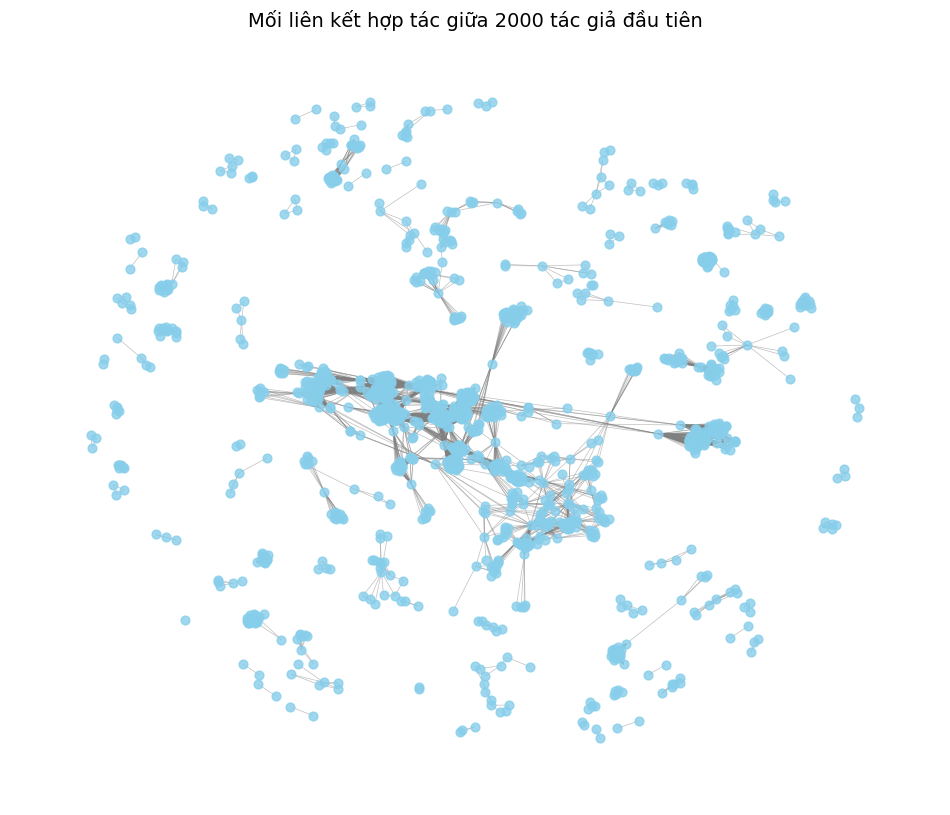

In [29]:
# Lấy 1000 tác giả đầu tiên trong mạng
sample_nodes = list(G.nodes())[:2000]
subgraph = G.subgraph(sample_nodes)

# Tính layout để bố trí mạng
pos = nx.spring_layout(subgraph, k=0.3, seed=42)

# Vẽ nút và cạnh (chỉ thể hiện liên kết)
plt.figure(figsize=(12, 10))

nx.draw_networkx_edges(subgraph, pos, width=0.5, alpha=0.5, edge_color="gray")
nx.draw_networkx_nodes(subgraph, pos, node_size=40, node_color="skyblue", alpha=0.8)

plt.title("Mối liên kết hợp tác giữa 2000 tác giả đầu tiên", fontsize=14)
plt.axis("off")
plt.show()


# Phân cụm cộng đồng tác giả

In [5]:
# Loại bỏ multi-edges
# Dùng Graph() thay vì Graph.MultiGraph()
ig_graph = ig.Graph.TupleList(
    ((u, v, d["Weight"]) for u, v, d in G.edges(data=True)), 
    directed=False, 
    weights=True
)
# --- Louvain (networkx + community_louvain) ---
louvain_partition = community_louvain.best_partition(G)
labels_louvain = list(louvain_partition.values())

# --- Leiden ---
leiden_partition = ig_graph.community_leiden(objective_function="modularity")
labels_leiden = leiden_partition.membership

# --- Fast Greedy ---
fg_partition = ig_graph.community_fastgreedy().as_clustering()
labels_fg = fg_partition.membership

print("Số cộng đồng (Louvain):", len(set(labels_louvain)))
print("Số cộng đồng (Leiden):", len(set(labels_leiden)))
print("Số cộng đồng (Fast Greedy):", len(set(labels_fg)))

# ==============================
#   
# ==============================

# ---- Modularity ----
mod_louvain = community_louvain.modularity(louvain_partition, G)
mod_leiden  = leiden_partition.modularity
mod_fg      = fg_partition.modularity

print("\n Modularity:")
print("  Louvain:", mod_louvain)
print("  Leiden :", mod_leiden)
print("  Fast Greedy:", mod_fg)

# ---- Normalized Mutual Information (NMI) ----
nmi_louvain_leiden = normalized_mutual_info_score(labels_louvain, labels_leiden)
nmi_louvain_fg     = normalized_mutual_info_score(labels_louvain, labels_fg)
nmi_leiden_fg      = normalized_mutual_info_score(labels_leiden, labels_fg)

print("\n NMI (so sánh giữa các thuật toán):")
print("  Louvain vs Leiden:", nmi_louvain_leiden)
print("  Louvain vs FastGreedy:", nmi_louvain_fg)
print("  Leiden vs FastGreedy:", nmi_leiden_fg)

# ---- Adjusted Rand Index (ARI) ----
ari_louvain_leiden = adjusted_rand_score(labels_louvain, labels_leiden)
ari_louvain_fg     = adjusted_rand_score(labels_louvain, labels_fg)
ari_leiden_fg      = adjusted_rand_score(labels_leiden, labels_fg)

print("\n Adjusted Rand Index (ARI):")
print("  Louvain vs Leiden:", ari_louvain_leiden)
print("  Louvain vs FastGreedy:", ari_louvain_fg)
print("  Leiden vs FastGreedy:", ari_leiden_fg)

Số cộng đồng (Louvain): 1167
Số cộng đồng (Leiden): 1167
Số cộng đồng (Fast Greedy): 1164

 Modularity:
  Louvain: 0.9415999221781836
  Leiden : 0.9418190438204084
  Fast Greedy: 0.9343458692026828

 NMI (so sánh giữa các thuật toán):
  Louvain vs Leiden: 0.8004185040697945
  Louvain vs FastGreedy: 0.7972114293564753
  Leiden vs FastGreedy: 0.9909416119694312

 Adjusted Rand Index (ARI):
  Louvain vs Leiden: 0.22629503243579696
  Louvain vs FastGreedy: 0.21464924387378018
  Leiden vs FastGreedy: 0.9119042986463575


Ba thuật toán cho số lượng cộng đồng gần như tương đương.

**Modularity**:

* Leiden: 0.9418, cao nhất
* Louvain: 0.9415, rất sát Leiden
* Fast Greedy: 0.9343, thấp hơn một chút

Leiden cho kết quả tốt nhất về chất lượng phân cụm

**NMI (Normalized Mutual Information)**:

* Louvain và Leiden: 0.80, mức độ tương đồng khá cao
* Louvain và Fast Greedy: 0.79, tương tự
* Leiden và Fast Greedy: 0.99, gần như giống nhau

**ARI (Adjusted Rand Index)**:

* Louvain và Leiden: 0.226, mức tương đồng thấp
* Louvain và Fast Greedy: 0.215, cũng thấp
* Leiden và Fast Greedy: 0.91, mức tương đồng rất cao

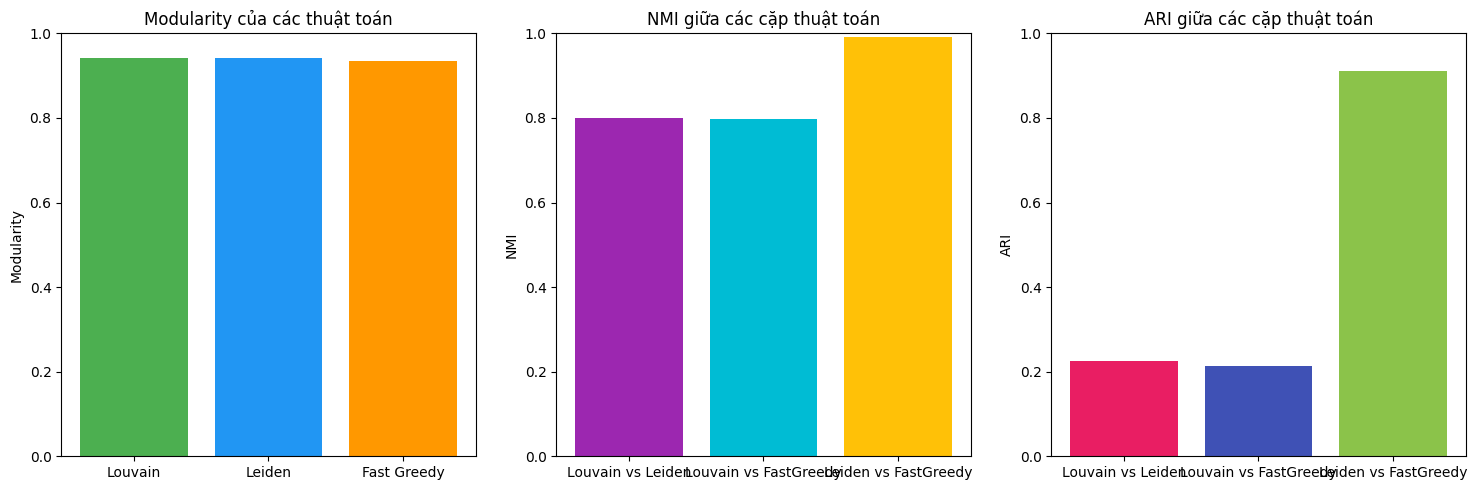

In [6]:
# ==============================
# Trực quan hóa kết quả đánh giá 
# ==============================

# Modularity
mod_scores = {
    "Louvain": mod_louvain,
    "Leiden": mod_leiden,
    "Fast Greedy": mod_fg
}

# NMI giữa các cặp
nmi_scores = {
    "Louvain vs Leiden": nmi_louvain_leiden,
    "Louvain vs FastGreedy": nmi_louvain_fg,
    "Leiden vs FastGreedy": nmi_leiden_fg
}

# ARI giữa các cặp
ari_scores = {
    "Louvain vs Leiden": ari_louvain_leiden,
    "Louvain vs FastGreedy": ari_louvain_fg,
    "Leiden vs FastGreedy": ari_leiden_fg
}

# ==============================
# Vẽ biểu đồ
# ==============================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# --- Biểu đồ Modularity ---
axes[0].bar(mod_scores.keys(), mod_scores.values(), color=['#4CAF50','#2196F3','#FF9800'])
axes[0].set_title("Modularity của các thuật toán")
axes[0].set_ylabel("Modularity")
axes[0].set_ylim(0, 1)

# --- Biểu đồ NMI ---
axes[1].bar(nmi_scores.keys(), nmi_scores.values(), color=['#9C27B0','#00BCD4','#FFC107'])
axes[1].set_title("NMI giữa các cặp thuật toán")
axes[1].set_ylabel("NMI")
axes[1].set_ylim(0, 1)

# --- Biểu đồ ARI ---
axes[2].bar(ari_scores.keys(), ari_scores.values(), color=['#E91E63','#3F51B5','#8BC34A'])
axes[2].set_title("ARI giữa các cặp thuật toán")
axes[2].set_ylabel("ARI")
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()


## Nhận xét trực quan

### Modularity

* Cả ba thuật toán Louvain, Leiden và Fast Greedy đều đạt modularity rất cao (xấp xỉ 0.93–0.94).
* Leiden nhỉnh hơn một chút, Louvain gần bằng, Fast Greedy thấp hơn nhưng không đáng kể.
* Điều này cho thấy cấu trúc cộng đồng trong mạng lưới tác giả rất rõ ràng, cả ba phương pháp đều phát hiện tốt.

### NMI (Normalized Mutual Information)

* NMI giữa Louvain và Leiden, cũng như giữa Louvain và Fast Greedy, đều ở mức khoảng 0.8 → khá cao.
* NMI giữa Leiden và Fast Greedy đạt gần 1 → hai thuật toán này gần như cho ra cùng một cách phân cụm.
* Nhìn chung, các thuật toán đồng thuận mạnh với nhau, chứng tỏ cấu trúc mạng cộng tác ổn định.

### ARI (Adjusted Rand Index)

* ARI giữa Louvain và Leiden (~0.22) và giữa Louvain và Fast Greedy (~0.21) khá thấp, cho thấy Louvain tạo ra khác biệt đáng kể so với hai thuật toán kia.
* Ngược lại, ARI giữa Leiden và Fast Greedy đạt ~0.91, cho thấy hai phương pháp này phân chia cộng đồng gần như giống nhau.

### Kết luận

* Leiden và Fast Greedy cho kết quả tương đồng rất cao cả về NMI và ARI, đồng thời modularity cũng tốt, → có thể coi đây là hai phương pháp đáng tin cậy nhất cho dữ liệu này.
* Louvain tuy modularity vẫn cao, nhưng cách phân cụm khác biệt hơn so với hai thuật toán còn lại.


Kích thước 10 cộng đồng lớn nhất:
Cộng đồng 1 (ID=16): 345 nodes
Cộng đồng 2 (ID=17): 271 nodes
Cộng đồng 3 (ID=2): 251 nodes
Cộng đồng 4 (ID=22): 231 nodes
Cộng đồng 5 (ID=13): 203 nodes
Cộng đồng 6 (ID=23): 190 nodes
Cộng đồng 7 (ID=14): 175 nodes
Cộng đồng 8 (ID=441): 165 nodes
Cộng đồng 9 (ID=21): 140 nodes
Cộng đồng 10 (ID=15): 139 nodes


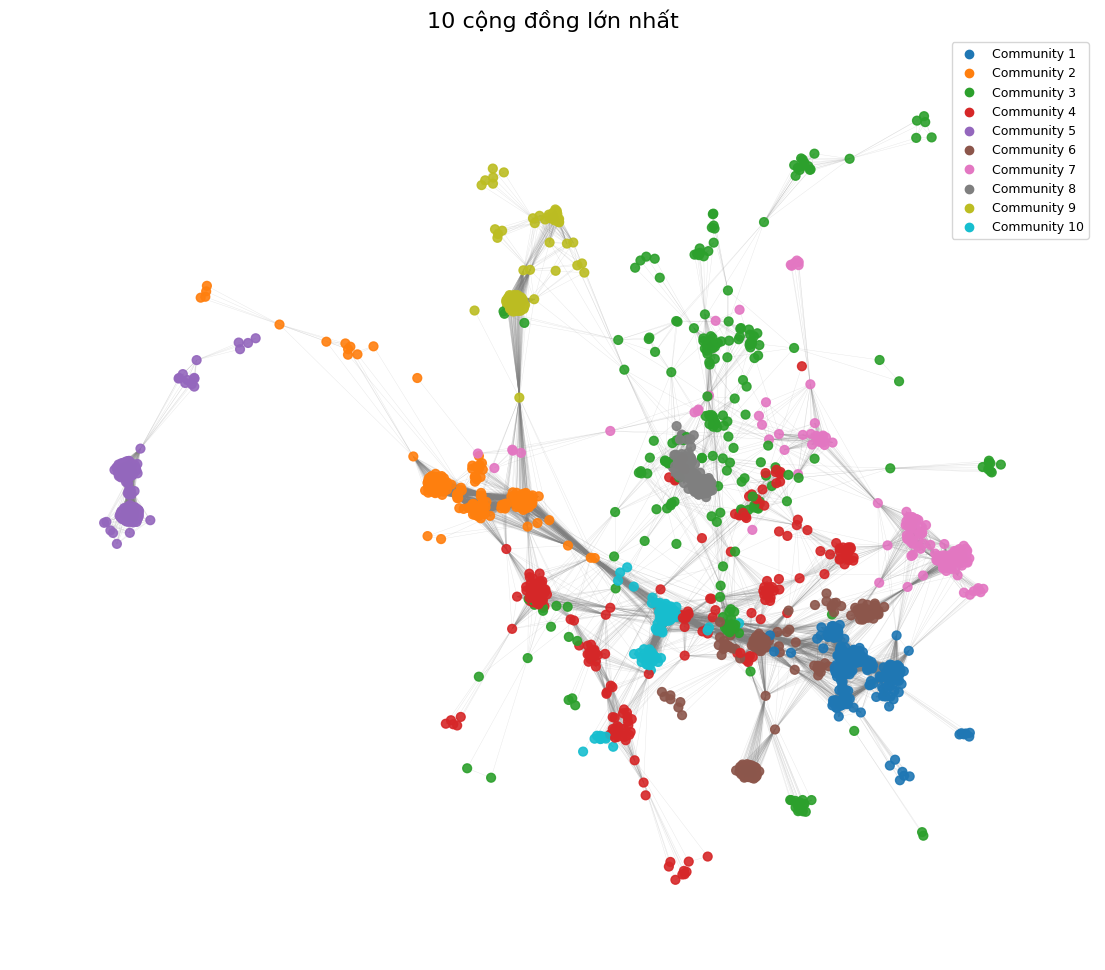

In [30]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

# --- Lấy kết quả Louvain ---
partition = louvain_partition  # có dạng {node: community_id}

# --- Gom node theo cộng đồng ---
community_dict = {}
for node, comm in partition.items():
    community_dict.setdefault(comm, []).append(node)

# --- Sắp xếp theo kích thước cộng đồng ---
sorted_comms = sorted(community_dict.items(), key=lambda x: len(x[1]), reverse=True)
top10_comms = sorted_comms[:10]

print("Kích thước 10 cộng đồng lớn nhất:")
for i, (cid, members) in enumerate(top10_comms, 1):
    print(f"Cộng đồng {i} (ID={cid}): {len(members)} nodes")

# --- Tạo tập node cho 10 cộng đồng ---
top10_nodes = [node for cid, members in top10_comms for node in members]
subG = G.subgraph(top10_nodes)

# --- Ánh xạ cộng đồng thành màu ---
colors = plt.cm.tab10(np.linspace(0, 1, 10))
color_map = []
for node in subG.nodes():
    comm_id = partition[node]
    comm_idx = [cid for cid, _ in top10_comms].index(comm_id)
    color_map.append(colors[comm_idx])

# --- Layout ---
pos = nx.spring_layout(subG, k=0.25, seed=42)

# --- Vẽ mạng ---
plt.figure(figsize=(14, 12))
nx.draw_networkx_edges(subG, pos, alpha=0.2, edge_color="gray", width=0.3)
nx.draw_networkx_nodes(subG, pos, node_color=color_map, node_size=40, alpha=0.9)
plt.title("10 cộng đồng lớn nhất", fontsize=16)
plt.axis("off")

# --- Tạo chú thích màu ---
for i, (cid, _) in enumerate(top10_comms):
    plt.scatter([], [], color=colors[i], label=f"Community {i+1}")
plt.legend(loc="upper right", fontsize=9)

plt.show()


### Phân tích cộng đồng nghiên cứu


In [8]:
# ===== 1. Thông tin mạng =====
print(f"Số lượng tác giả (nodes): {G.number_of_nodes():,}")
print(f"Số lượng mối quan hệ hợp tác (edges): {G.number_of_edges():,}")

Số lượng tác giả (nodes): 9,212
Số lượng mối quan hệ hợp tác (edges): 136,198


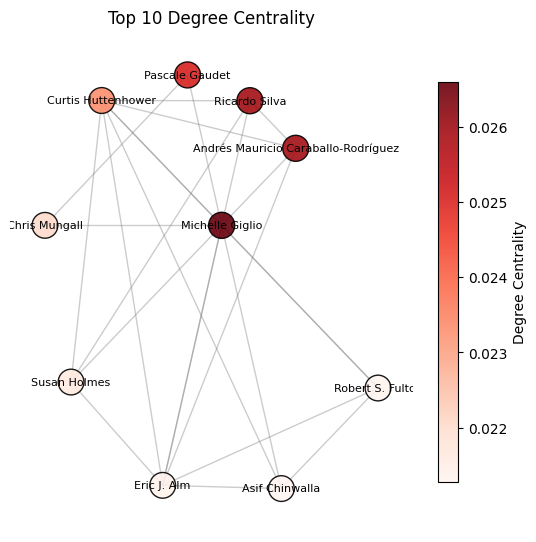

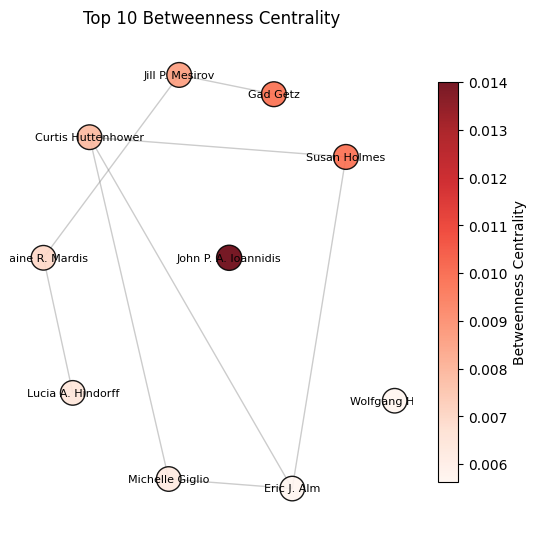

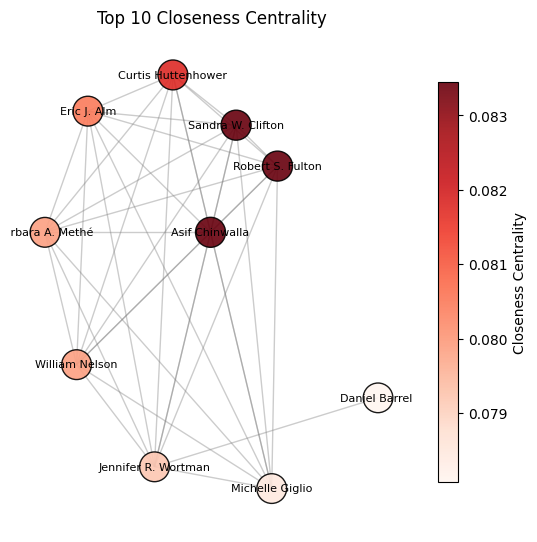

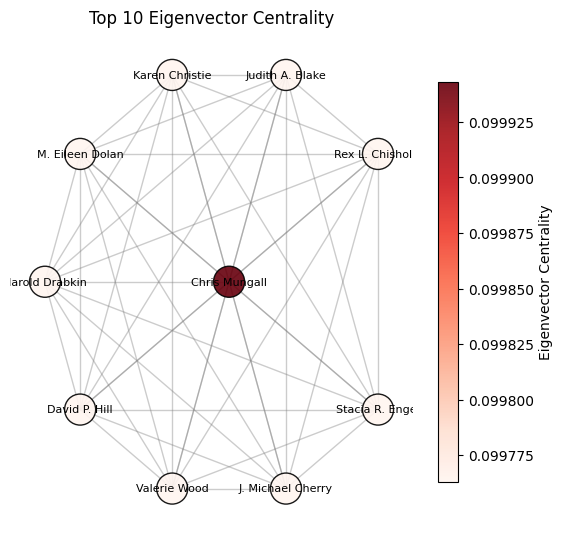

In [28]:
# ===== 2. Tính các chỉ số centrality và vẽ top10 =====
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# 1) Bỏ các cạnh tự nối
G = G.copy()
G.remove_edges_from(nx.selfloop_edges(G))

# 2) Tính các chỉ số centrality
deg_c  = nx.degree_centrality(G)
bet_c  = nx.betweenness_centrality(G, k=min(2000, max(10, int(len(G)*0.15))), seed=42)
close_c = nx.closeness_centrality(G)
try:
    eig_c = nx.eigenvector_centrality(G, max_iter=2000)
except nx.PowerIterationFailedConvergence:
    eig_c = nx.eigenvector_centrality_numpy(G)

def _finite(d):
    return {k: float(v) for k, v in d.items() if v == v and np.isfinite(v)}

deg_c, bet_c, close_c, eig_c = map(_finite, [deg_c, bet_c, close_c, eig_c])

# 3) Hàm vẽ top10 centrality
def plot_top10_centrality(G, cdict, title, cmap_name="Reds"):
    if not cdict: return
    top10_nodes = sorted(cdict, key=cdict.get, reverse=True)[:10]
    subG = G.subgraph(top10_nodes).copy()
    subG.remove_edges_from(nx.selfloop_edges(subG))

    vals = [cdict[n] for n in top10_nodes]
    vmin, vmax = min(vals), max(vals)
    norms = [(v - vmin) / (vmax - vmin + 1e-9) for v in vals]
    angles = np.linspace(0, 2*np.pi, len(top10_nodes), endpoint=False)
    pos = {top10_nodes[0]: (0,0)}
    for i, node in enumerate(top10_nodes[1:], start=1):
        r = 2 + 3*(1 - norms[i])
        pos[node] = (r*np.cos(angles[i]), r*np.sin(angles[i]))

    sizes = [300 + 2000 * cdict[n] for n in subG.nodes()]
    colors = [cdict[n] for n in subG.nodes()]

    plt.figure(figsize=(6.5,6.5))
    nx.draw_networkx_edges(subG, pos, alpha=0.4, edge_color="gray", width=1)
    nodes = nx.draw_networkx_nodes(subG, pos, node_size=sizes,
                                   node_color=colors, cmap=cmap_name,
                                   edgecolors="black", alpha=0.9)
    nx.draw_networkx_labels(subG, pos, font_size=8, font_color="black")
    plt.colorbar(nodes, shrink=0.8, label=title)
    plt.title(f"Top 10 {title}", fontsize=12)
    plt.axis("off"); plt.show()

# 4) Vẽ 4 chỉ số
plot_top10_centrality(G, deg_c,   "Degree Centrality")
plot_top10_centrality(G, bet_c,   "Betweenness Centrality")
plot_top10_centrality(G, close_c, "Closeness Centrality")
plot_top10_centrality(G, eig_c,   "Eigenvector Centrality")



-   Michelle Giglio (0.0266) → là tác giả có nhiều cộng tác nhất.

-   Những tác giả như Ricardo Silva, Pascale Gaudet, Curtis Huttenhower cũng có độ kết nối cao.

-   Degree cao → tác giả nằm ở trung tâm mạng, hợp tác với nhiều người.

### Betweenness Centrality

Cho biết tác giả nào là cầu nối giữa các nhóm khác nhau.

Ví dụ: Susan Holmes có betweenness 0.0111 → đóng vai trò kết nối các nhóm nghiên cứu.

### Closeness Centrality

Ai có thể tiếp cận nhanh nhất tất cả các tác giả khác trong mạng.

Curtis Huttenhower (0.0817) → nằm ở vị trí thuận lợi để lan truyền thông tin.

### Eigenvector Centrality

Ai có ảnh hưởng vì kết nối với những tác giả quan trọng khác.

Chris Mungall (0.0999) → mặc dù degree không cao nhất nhưng ảnh hưởng lớn vì liên kết với các tác giả trung tâm.

### Phân tích cộng đồng trong mạng hợp tác tác giả
1. Quy mô mạng

- Số nodes (tác giả): 9212 → tập hợp rất lớn, có nhiều tác giả tham gia vào lĩnh vực nghiên cứu.

- Số edges (cộng tác): 136198 → mạng hợp tác có mật độ cao, cho thấy có sự kết nối rộng rãi giữa các tác giả.

- Số cộng đồng phát hiện được: 1167 → mạng được phân chia thành nhiều cộng đồng nhỏ hơn, phản ánh các nhóm nghiên cứu hay trường phái học thuật khác nhau.

2. Các tác giả trung tâm (Top 10 theo Degree Centrality)

- Michelle Giglio, Pascale Gaudet, Chris Mungall có giá trị Eigenvector Centrality rất cao → không chỉ kết nối rộng rãi mà còn có ảnh hưởng trong những cụm tác giả quan trọng.

- Curtis Huttenhower, Susan Holmes, Eric J. Alm, Robert S. Fulton có Closeness Centrality cao → họ nằm ở vị trí gần trung tâm mạng, dễ dàng tiếp cận và kết nối đến các tác giả khác.

- Susan Holmes có Betweenness Centrality cao nhất trong nhóm top 10 → đóng vai trò “cầu nối” quan trọng giữa các cộng đồng.

3. Cấu trúc cộng đồng

- 1167 cộng đồng được phát hiện cho thấy mạng có cấu trúc phân mảnh tự nhiên, các nhóm nghiên cứu chuyên sâu về những chủ đề cụ thể.

- Một số cộng đồng tập trung quanh những tác giả trung tâm (ví dụ Michelle Giglio, Chris Mungall) → đây có thể là các nhóm nghiên cứu lớn, có nhiều hợp tác và ảnh hưởng.

- Sự tồn tại của nhiều cộng đồng nhỏ phản ánh sự đa ngành, nhiều nhánh nghiên cứu song song trong lĩnh vực.

4. Ý nghĩa

- Việc phân tích cộng đồng giúp nhận diện các nhóm hợp tác mạnh, tác giả chủ chốt, và các cầu nối tri thức trong mạng lưới khoa học.

- Có thể khai thác kết quả này để:

* Xác định các cụm chủ đề nổi bật.

* Tìm ra những tác giả then chốt cần theo dõi để hiểu sự phát triển của lĩnh vực.

* Phát hiện các cộng đồng ít kết nối, từ đó gợi ý hướng tăng cường hợp tác liên ngành.

In [17]:
import os

# Đọc nodes hiện tại (Id + Louvain/Leiden/FastGreedy)
if os.path.exists("Project1A_coauthor_nodes_gephi.csv"):
	nodes = pd.read_csv("Project1A_coauthor_nodes_gephi.csv")
else:
	# Tạo file nodes từ graph G nếu chưa tồn tại
	nodes = pd.DataFrame({"Id": list(G.nodes)})
	nodes.to_csv("Project1A_coauthor_nodes_gephi.csv", index=False)

# Tạo centrality_df từ các dict centrality đã tính trước đó
centrality_df = pd.DataFrame({
	"Degree": pd.Series(deg_c),
	"Betweenness": pd.Series(bet_c),
	"Closeness": pd.Series(close_c),
	"Eigenvector": pd.Series(eig_c)
})

# Map các giá trị centrality vào nodes
nodes["Degree"] = nodes["Id"].map(centrality_df["Degree"])
nodes["Betweenness"] = nodes["Id"].map(centrality_df["Betweenness"])
nodes["Closeness"] = nodes["Id"].map(centrality_df["Closeness"])
nodes["Eigenvector"] = nodes["Id"].map(centrality_df["Eigenvector"])
# Thêm cột tên tác giả từ thuộc tính 'name'
nodes["Name"] = nodes["Id"].map(nx.get_node_attributes(G, "name"))
# Lưu lại file nodes mới cho Gephi
nodes.to_csv("nodes_gephi_with_centrality.csv", index=False, encoding="utf-8")

print("Hoàn tất! File nodes_gephi_with_centrality.csv đã được tạo.")

Hoàn tất! File nodes_gephi_with_centrality.csv đã được tạo.
